### Stock Market Prediction And Forecasting Using Stacked LSTM

In [75]:
# # test functions to check for tensorflow
# # !source ~/miniconda/bin/activate

# import tensorflow as tf

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [76]:
### Keras and Tensorflow >2.0

In [77]:
### Data Collection
import pandas_datareader as pdr
import numpy as np
import pandas as pd

In [78]:
df=pd.read_csv('AAPL.csv')

In [79]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [80]:
close_prices=df.reset_index()['close']

In [81]:
close_prices

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

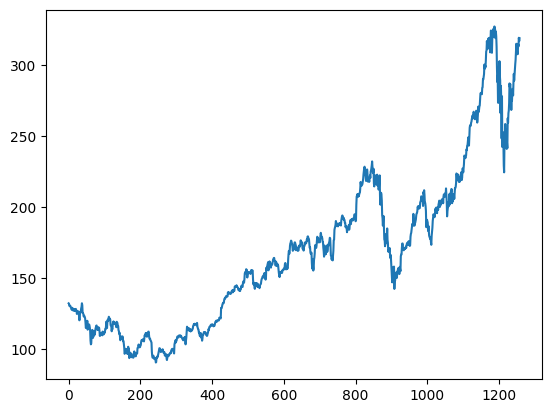

In [82]:
import matplotlib.pyplot as plt
plt.plot(close_prices)

# Scaling and Normalization

In [83]:
close_prices

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [84]:
# def mean_norm(df, labels=[]):
#   scale_columns = None

#   if (len(labels) > 1):
#     scale_columns = df[labels]
#     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
#   else:
#     scale_columns = df
#     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
#     # print(scale_columns.head())
#   return (scale_columns)

# # def invert_mean(df, labels=[]):
# #     scale_columns = None

# #   if (len(labels) > 1):
# #     scale_columns = df[labels]
# #     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
# #   else:
# #     scale_columns = df
# #     scale_columns = (scale_columns-scale_columns.mean())/scale_columns.std()
# #     # print(scale_columns.head())
# #   return (scale_columns)

# def scale(df, labels=[]):
#   scale_columns = None

#   if (len(labels) > 1):
#     scale_columns = df[labels]
#     scale_columns = (scale_columns-scale_columns.min())/(scale_columns.max()-scale_columns.min())
#   else:
#     scale_columns = df
#     scale_columns = (scale_columns-scale_columns.min())/(scale_columns.max()-scale_columns.min())
#     # print(scale_columns.head())
#   return (scale_columns)  

# # def invert_scale(df, maxp, minp):
# #   scale_columns = None

# #   if (len(labels) > 1):
# #     scale_columns = df[labels]
# #     scale_columns = scale_columns * (maxp-minp) + minp
# #   else:
# #     scale_columns = df
# #     # print(scale_columns.head())
# #   return (scale_columns)  

# maxp = close_prices.max()
# minp = close_prices.min()


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close_prices).reshape(-1,1))
close.shape

(1258, 1)

In [85]:
print(close)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [86]:
# close = np.array(close).reshape(len(close), 1)
# print(close)

## creating train and test sets

In [87]:

split=int(len(close)*0.7)
print(close[split-5:split,:])
train, test = close[:split,:], close[split:,:1]
# print(test)


[[0.43016972]
 [0.40724479]
 [0.42670776]
 [0.43565819]
 [0.4032762 ]]


In [88]:
len(train),len(test)

(880, 378)

### allows us to create a backtesting dataset
### according to how long we want to look into
### the past to predict a specific day

In [89]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [90]:

time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, ytest = create_dataset(test, time_step)

In [91]:
print(X_train.shape), print(y_train.shape)

print(X_test)

(779, 100)
(779,)
[[0.3657857  0.36494132 0.34598497 ... 0.45820316 0.45972304 0.45980748]
 [0.36494132 0.34598497 0.355822   ... 0.45972304 0.45980748 0.47618847]
 [0.34598497 0.355822   0.35421768 ... 0.45980748 0.47618847 0.47927046]
 ...
 [0.81875369 0.84256523 0.84210082 ... 0.92544119 0.91771511 0.9483239 ]
 [0.84256523 0.84210082 0.84936249 ... 0.91771511 0.9483239  0.94064004]
 [0.84210082 0.84936249 0.85835515 ... 0.9483239  0.94064004 0.96635143]]


In [92]:
print(X_test.shape), print(ytest.shape)

(277, 100)
(277,)


(None, None)

In [93]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [94]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [95]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2022-11-30 23:55:17.715657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:17.979277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:18.152098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:18.362112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:18.564792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:18.899058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:19.238068: I tensorflow/core/grappler/optimizers/cust

13/13 [==============================] - ETA: 0s - loss: 0.0243

2022-11-30 23:55:22.292355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:22.386592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:22.543586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:55:22.707317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 7s 320ms/step - loss: 0.0243 - val_loss: 0.0629
Epoch 2/100
13/13 [==============================] - 1s 98ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 3/100
13/13 [==============================] - 1s 94ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 4/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0010 - val_loss: 0.0055
Epoch 5/100
13/13 [==============================] - 1s 93ms/step - loss: 7.4331e-04 - val_loss: 0.0087
Epoch 6/100
13/13 [==============================] - 1s 109ms/step - loss: 7.5180e-04 - val_loss: 0.0066
Epoch 7/100
13/13 [==============================] - 1s 92ms/step - loss: 7.5601e-04 - val_loss: 0.0066
Epoch 8/100
13/13 [==============================] - 1s 93ms/step - loss: 7.4991e-04 - val_loss: 0.0057
Epoch 9/100
13/13 [==============================] - 1s 95ms/step - loss: 6.8010e-04 - val_loss: 0.0068
Epoch 10/100
13/13 [==============================] - 1s 96ms/step - loss: 6.8598e-04 - va

In [99]:
import tensorflow as tf

In [100]:
tf.__version__

'2.10.0'

In [101]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2022-11-30 23:57:22.825797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:57:22.911800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:57:23.064904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 23:57:23.222578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 85ms/step


In [102]:

##Transform back to original form
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)


In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

149.66010046852693

In [104]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

244.94307823038153

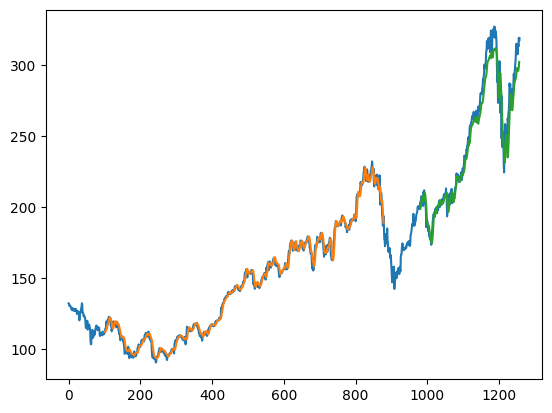

In [105]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [106]:
len(test)
x_input=test[-100:].reshape(1, -1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input
print(len(temp_input))

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
days = 30
while(i<days):
    
    if(len(temp_input)>n_steps):
        print("i = ", str(i), "\n")
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(len(temp_input), "\n")
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print("i = ", str(i))
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input), "\n")
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)
lst_output = np.array(lst_output)

100
i =  0
[0.91632223]
101 

i =  1 

101 

i =  2 

101 

i =  3 

101 

i =  4 

101 

i =  5 

101 

i =  6 

101 

i =  7 

101 

i =  8 

101 

i =  9 

101 

i =  10 

101 

i =  11 

101 

i =  12 

101 

i =  13 

101 

i =  14 

101 

i =  15 

101 

i =  16 

101 

i =  17 

101 

i =  18 

101 

i =  19 

101 

i =  20 

101 

i =  21 

101 

i =  22 

101 

i =  23 

101 

i =  24 

101 

i =  25 

101 

i =  26 

101 

i =  27 

101 

i =  28 

101 

i =  29 

101 

[[0.9163222312927246], [0.9128969311714172], [0.9026236534118652], [0.8901578187942505], [0.8777927756309509], [0.8664568662643433], [0.8564110398292542], [0.8475855588912964], [0.8397271037101746], [0.8324770331382751], [0.8254281282424927], [0.8181804418563843], [0.8103892207145691], [0.8018041849136353], [0.7922943234443665], [0.7818588614463806], [0.7706190347671509], [0.758796215057373], [0.7466776967048645], [0.7345765829086304], [0.722788393497467], [0.7115534543991089], [0.7010300159454346], [0.6912828

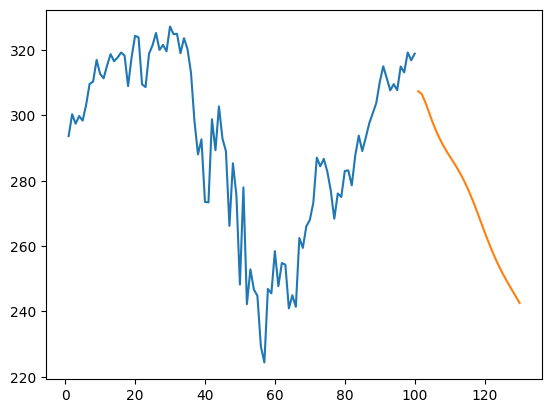

In [107]:
day_new=np.arange(1,n_steps+1)
day_pred=np.arange(101,101+days)
import matplotlib.pyplot as plt

plt.plot(day_new, scaler.inverse_transform(close[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


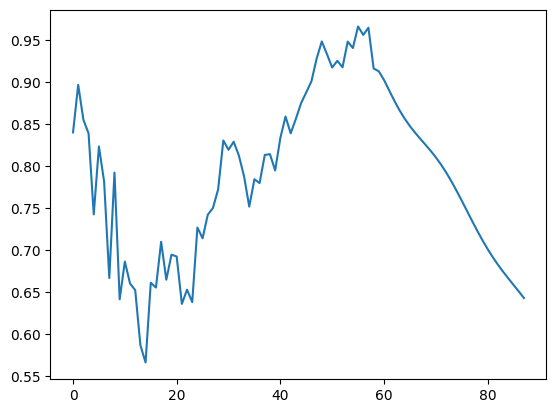

In [108]:
df3=close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


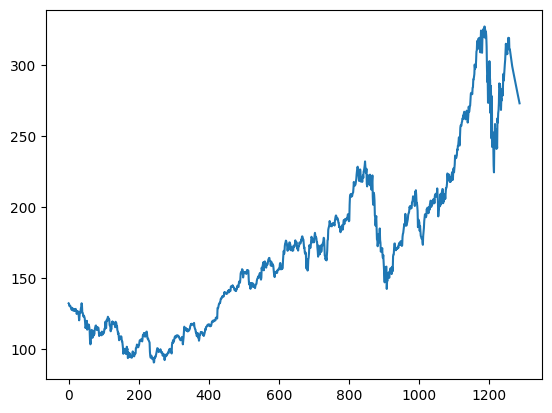

In [70]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# Export to Flask

In [158]:
import joblib
joblib.dump(model, "stock_price_prediction_model.ml")

INFO:tensorflow:Assets written to: ram://f8ecac0b-2a0a-4c74-82db-01dccbe1d648/assets


INFO:tensorflow:Assets written to: ram://f8ecac0b-2a0a-4c74-82db-01dccbe1d648/assets


['stock_price_prediction_model.ml']